##**Import** :

In [1]:
import datetime as dt
import pandas_datareader.data as dr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
#from pandas_datareader.yahoo.daily import YahooDailyReader

#import measure
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
def RMSE(y_true,y_false):
  return math.sqrt(MSE(y_true,y_false))
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


#import Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble  import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf

In [2]:

!python --version
print(tf.__version__)


Python 3.7.12
2.6.0


In [3]:
#symbol of stock to predict.
#The first symbol will be the prediction target
stock = ['MSFT', '^NDQ', '^SPX']
#stock = 'TSLA'

#value need to predict
order = ['Open', 'High', 'Low', 'Close']

In [4]:
def plot(X,Ytest=None,Ypred=None,Y3=None,Xtrain=None,Ytrain=None,Title=None,Xlabel=None,Ylabel=None):
  plt.style.use('seaborn')
  plt.figure(figsize=(32,16))
  
  if type(Ytest) is not type(None):
    plt.plot(X,Ytest, '-b', markersize=20, label = 'Actual')

  if type(Ypred) is not type(None):
    plt.plot(X,Ypred, '-r', markersize=15, label = 'Predict')

  if type(Y3) is not type(None):
    plt.plot(X,Y3, '-g', markersize=15, label = 'Y3')

  if type(Ytrain) is not type(None) and type(Xtrain) is not type(None):
    plt.plot(Xtrain,Ytrain, '-b', markersize=15)

    
  plt.title(Title,fontsize=18)
  plt.xlabel(Xlabel,fontsize=16)
  plt.ylabel(Ylabel,fontsize=16)
  plt.legend(loc="upper left",fontsize= 'large')
  

def result(y_true,y_pred, name=''):
  rmse_pred = RMSE(y_true,y_pred)
  mae_pred = MAE(y_true,y_pred)
  mape_pred = MAPE(y_true,y_pred)
  print(name,'RMSE:', rmse_pred)
  print(name,'MAE: ', mae_pred)
  print(name,'MAPE:', mape_pred)


###Link

> Read Stock: [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/)\
> Pandas: [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)\
> Tensorflow: [Tensorflow](https://www.tensorflow.org/tutorials/keras/regression)

##Note:

##**Preprocessing**

In [85]:

rawdb = dr.DataReader(stock,'stooq', start='01-01-2008', end=dt.datetime.today() )
rawdb.tail(10)

Attributes   Close                     ...      Volume                            
Symbols       MSFT      ^NDQ     ^SPX  ...        MSFT          ^NDQ          ^SPX
Date                                   ...                                        
2021-09-28  283.52  14546.68  4352.63  ...  43186237.0  3.400002e+09  2.411082e+09
2021-09-29  284.00  14512.44  4359.46  ...  26353696.0  3.652983e+09  1.899920e+09
2021-09-30  281.92  14448.58  4307.54  ...  32343635.0  3.165503e+09  2.292980e+09
2021-10-01  289.10  14566.70  4357.04  ...  30086280.0  3.179650e+09  2.202907e+09
2021-10-04  283.11  14255.48  4300.46  ...  31350747.0  3.052244e+09  2.352030e+09
2021-10-05  288.76  14433.83  4345.72  ...  24993024.0  2.791415e+09  2.026526e+09
2021-10-06  293.11  14501.91  4363.55  ...  28002559.0  3.012489e+09  2.062683e+09
2021-10-07  294.85  14654.02  4399.76  ...  20430471.0  2.727822e+09  1.942954e+09
2021-10-08  294.85  14579.54  4391.34  ...  17685700.0  2.418202e+09  1.683911e+09
2021-10-11  294.23  14486.20  4361.19  ...  19298634.0  2.301336e+09  1.683312e+09

[10 rows x 15 columns]

In [86]:
rawdb.shape

(3470, 15)

In [87]:
#Modified the order of the columns
db = rawdb[[ (order[0],stock[0]),(order[1],stock[0]),(order[2],stock[0]), (order[3],stock[0])   ]]

for i in stock[1:]:
 for j in order:
   db[(j,i)] = rawdb[[(j,i)]]


db.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Attributes,Open,High,Low,Close,Open,High,Low,Close,Open,High,Low,Close
Symbols,MSFT,MSFT,MSFT,MSFT,^NDQ,^NDQ,^NDQ,^NDQ,^SPX,^SPX,^SPX,^SPX
Date,,,,,,,,,,,,
2021-10-05,284.0464,290.3980,284.0464,288.76,14312.86,14508.65,14299.78,14433.83,4309.87,4369.23,4309.87,4345.72
2021-10-06,285.7800,293.6300,285.5093,293.11,14289.45,14509.55,14259.07,14501.91,4319.57,4365.57,4290.49,4363.55
2021-10-07,295.1750,296.6400,293.9200,294.85,14631.80,14755.72,14615.14,14654.02,4383.73,4429.97,4383.73,4399.76
2021-10-08,296.2190,296.6409,293.7600,294.85,14694.72,14699.91,14569.68,14579.54,4406.51,4412.02,4386.22,4391.34
2021-10-11,292.9200,297.9700,292.7450,294.23,14540.08,14665.99,14482.62,14486.20,4385.44,4415.88,4360.59,4361.19


In [88]:
db.shape

(3470, 12)

In [89]:
#drop all na
db = db.dropna()
db.shape

(3469, 12)

In [90]:
n = len(order)*len(stock)
for i in range(n):
  print(i//4)

0
0
0
0
1
1
1
1
2
2
2
2


In [91]:
y_close = db[[(order[3],stock[0])]].copy()
y_close = y_close.shift(-1)
y_close.tail()

Attributes,Close
Symbols,MSFT
Date,
2021-10-05,293.11
2021-10-06,294.85
2021-10-07,294.85
2021-10-08,294.23
2021-10-11,NaN


In [92]:
y_close.drop(y_close.tail(1).index,inplace=True)
y_close = y_close[(order[3],stock[0])]
db.drop(db.tail(1).index,inplace=True)

In [93]:
print(db.shape)
print(y_close.shape)
x_close = db.drop((order[3],stock[0]), axis=1)

(3468, 12)
(3468,)


In [94]:
#normalize if need
#normalized_df=(db_close-db_close.mean())/db_close.std()
#normalized_df=(df-df.min())/(df.max()-df.min())

In [95]:
x_close_train, x_close_test, y_close_train, y_close_test = train_test_split(x_close,y_close,test_size=0.25,random_state = 0,shuffle= False)
print(x_close_train.shape)
print(x_close_test.shape)
print(y_close_train.shape)
print(y_close_test.shape)

(2601, 11)
(867, 11)
(2601,)
(867,)


##**Training**

###Model: Linear Regression using Least Square


In [96]:
theta_best = np.linalg.inv(x_close_train.T.dot(x_close_train)).dot(x_close_train.T).dot(y_close_train)

In [97]:
print(theta_best)
y_close_pred_ls = x_close_test.dot(theta_best)

[-1.73187680e-01  6.62476964e-01  5.04682259e-01  8.92620007e-04
 -5.07479678e-03 -1.64993190e-03  6.02705222e-03  2.65369698e-04
  9.10296573e-04 -3.92147685e-03  2.43496245e-03]


In [98]:
result(y_close_test,y_close_pred_ls, 'LS')

LS RMSE: 3.079803382739052
LS MAE:  2.1021140479437026
LS MAPE: 1.2528875111577578


#### Graph for Linear Regression using Least Square

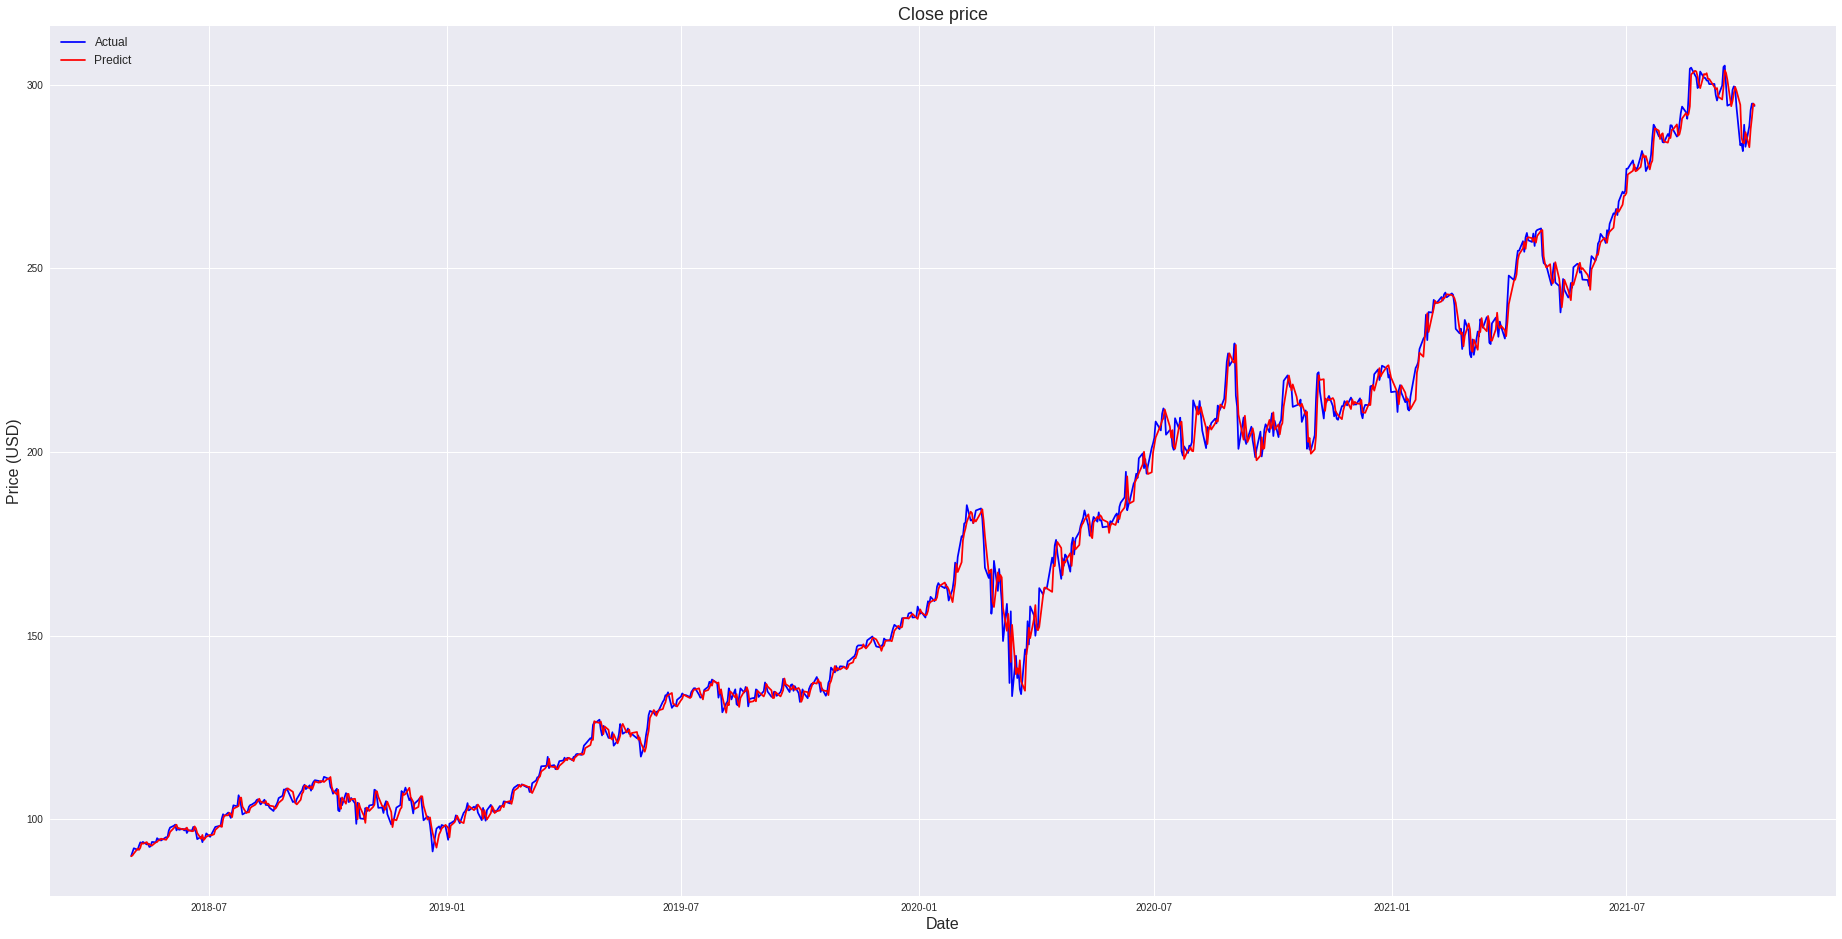

In [99]:
plot( y_close_test.sort_index().index,
     y_close_test.sort_index(),
     y_close_pred_ls.sort_index(),
     #y_close_pred_ts,
     #Xtrain = y_close_train.sort_index().index,
     Ytrain = y_close_train.sort_index(),
     Title = "Close price",
     Xlabel = 'Date',
     Ylabel = 'Price (USD)' 
)

###Model: Random Forest Regression (sklearn)

In [100]:
rf_model = RandomForestRegressor()
rf_model.fit(x_close_train,y_close_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [101]:
y_close_pred_rf = rf_model.predict(x_close_test.sort_index())

In [102]:
result(y_close_test,y_close_pred_rf)

 RMSE: 101.12135767751987
 MAE:  80.40846981545552
 MAPE: 39.97148070715656


####Graph for Random Forest

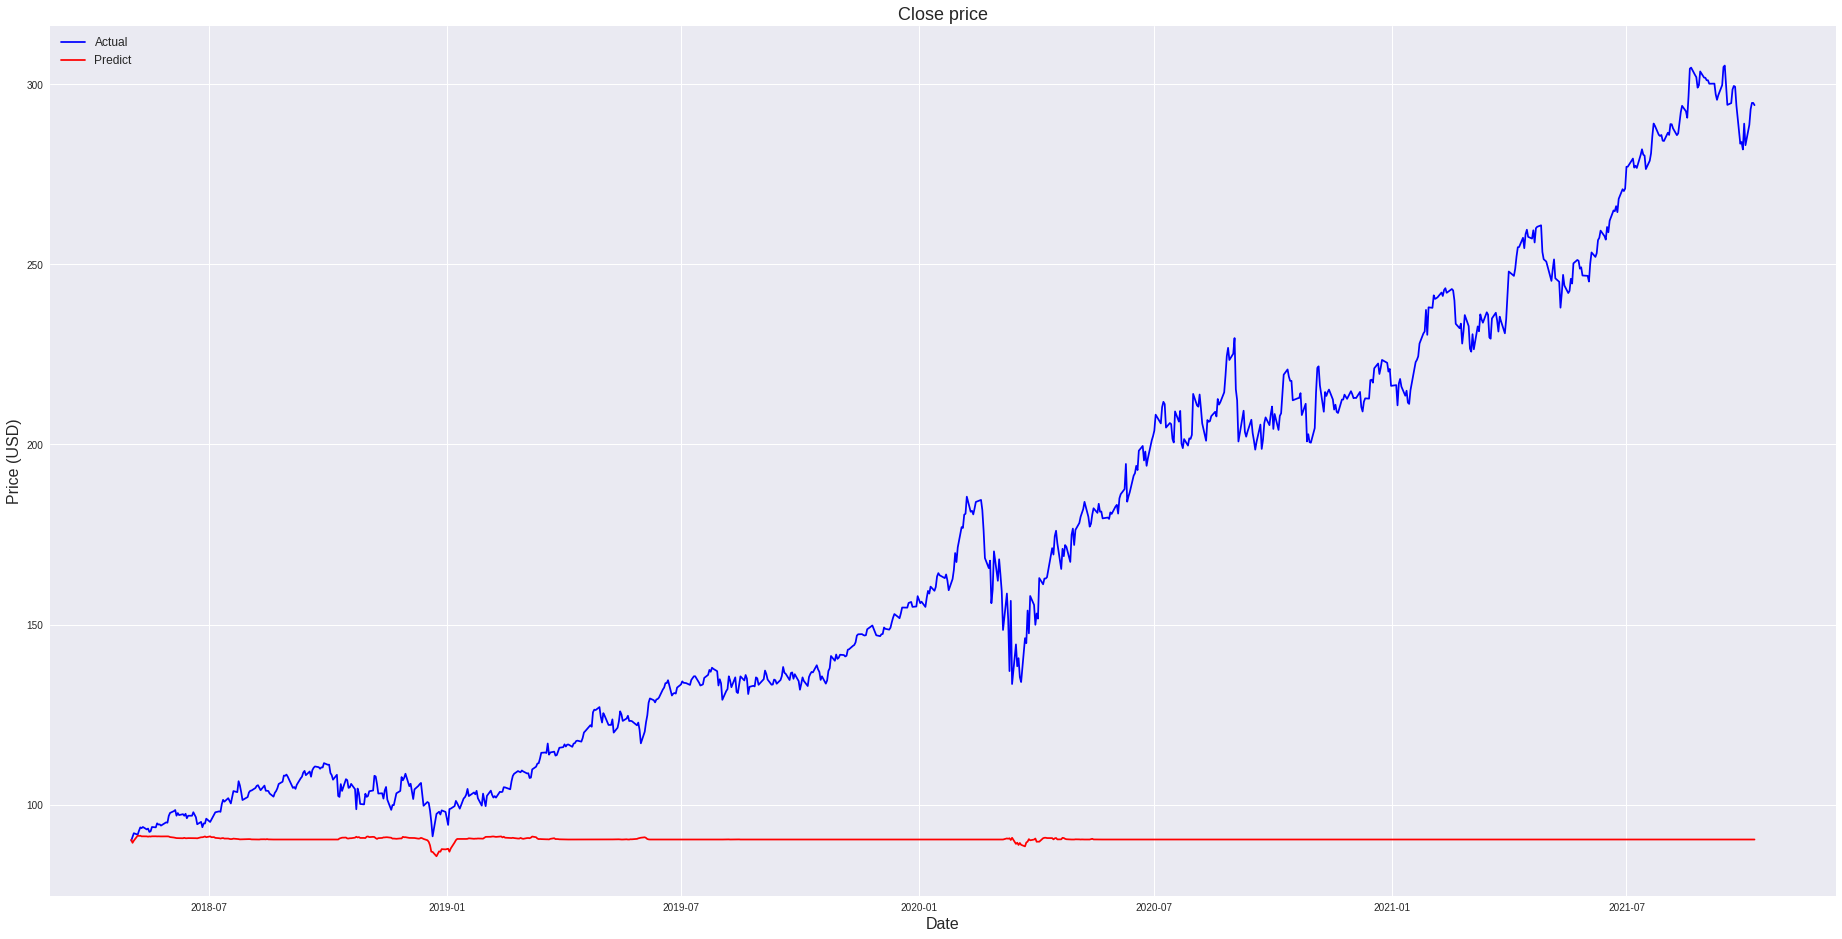

In [103]:
plot( y_close_test.sort_index().index,
     y_close_test.sort_index(),
     y_close_pred_rf,
     #Xtrain = y_close_train.sort_index().index,
     Ytrain = y_close_train.sort_index(),
     Title = "Close price",
     Xlabel = 'Date',
     Ylabel = 'Price (USD)' 
)

###Model: Support Vector Machine Regression (sklearn)

In [104]:
svr_model = SVR()
svr_model.fit(x_close_train,y_close_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [105]:
y_close_pred_svr = svr_model.predict(x_close_test.sort_index())

In [106]:
result(y_close_test,y_close_pred_svr)


 RMSE: 125.58659721247625
 MAE:  99.40576798612005
 MAPE: 49.4185782668112


####Graph for SVR

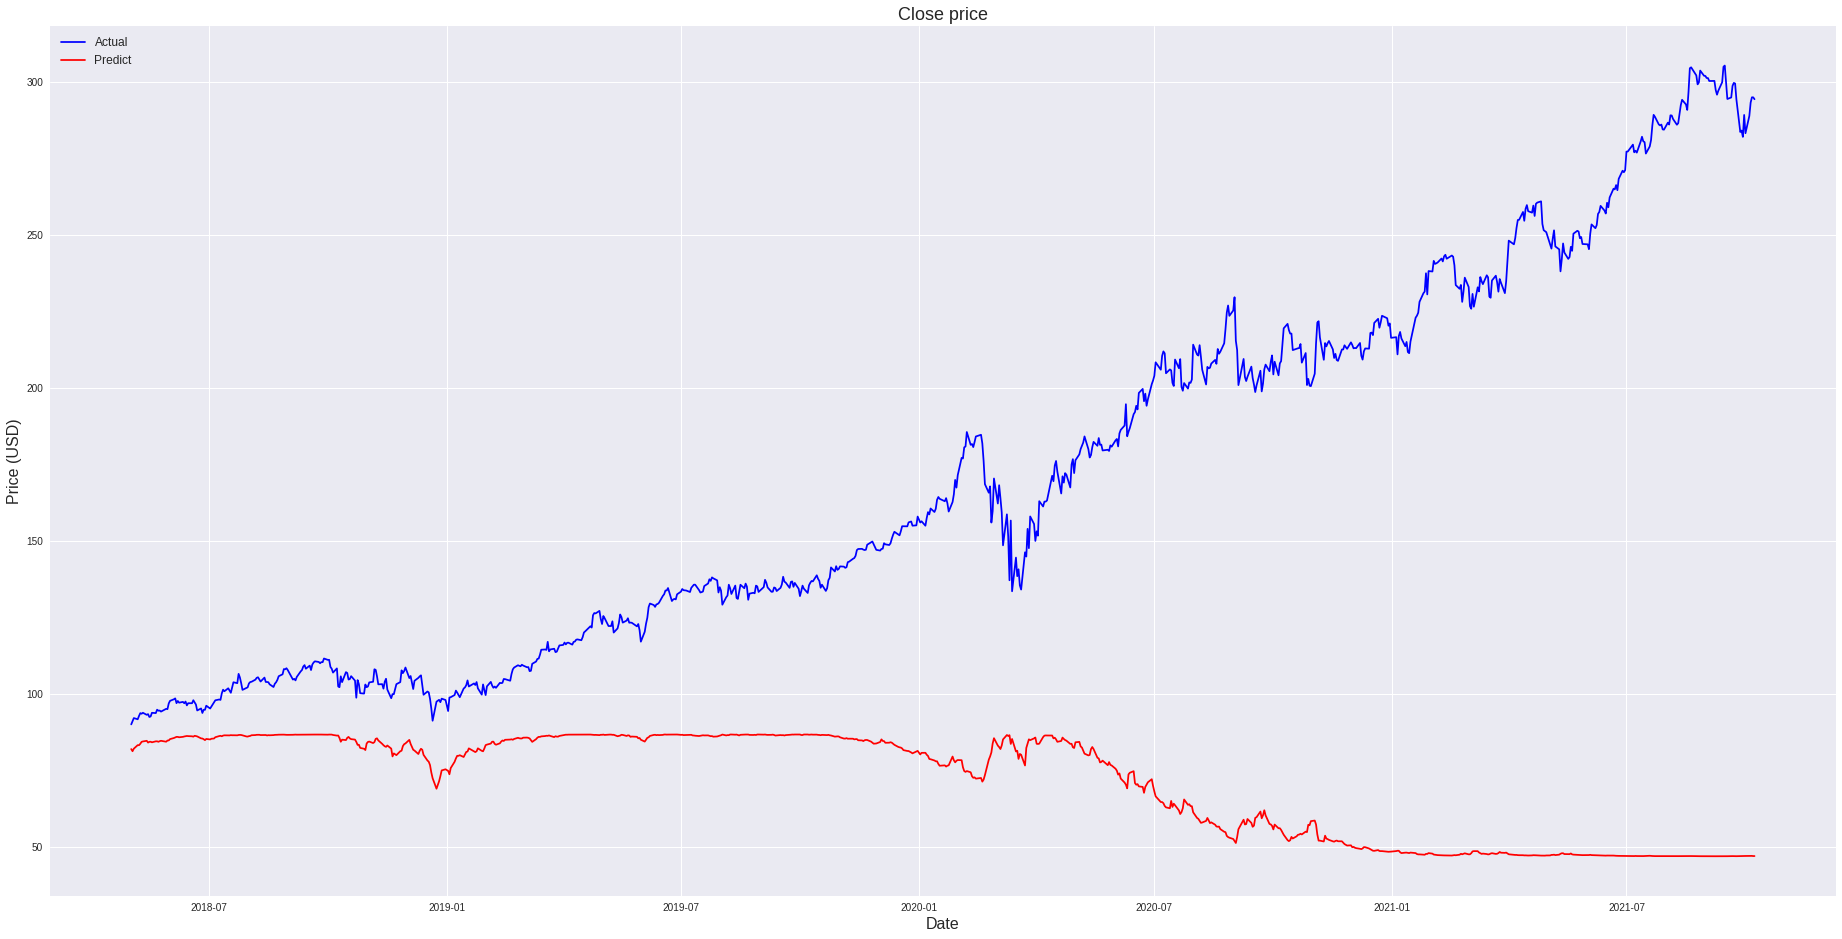

In [107]:
plot( y_close_test.sort_index().index,
     y_close_test.sort_index(),
     y_close_pred_svr,
     #Xtrain = y_close_train.sort_index().index,
     Ytrain = y_close_train.sort_index(),
     Title = "Close price",
     Xlabel = 'Date',
     Ylabel = 'Price (USD)' 
)

###Model: Multilayer (Tensorflow)

In [108]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(x_close_train))
#print(normalizer.mean.numpy())


In [109]:

model = tf.keras.Sequential(
    [
        normalizer,
        layers.Dense(8, activation="relu", name="layer1"),
        layers.Dense(4, activation="relu", name="layer2"),
        layers.Dense(1,activation="relu", name="layer3"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 11)                23        
_________________________________________________________________
layer1 (Dense)               (None, 8)                 96        
_________________________________________________________________
layer2 (Dense)               (None, 4)                 36        
_________________________________________________________________
layer3 (Dense)               (None, 1)                 5         
Total params: 160
Trainable params: 137
Non-trainable params: 23
_________________________________________________________________


In [110]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mse')


In [111]:
model.fit( x_close_train, y_close_train, epochs=20, verbose=0, validation_split = 0.2)


In [112]:
y_close_pred_ts = model.predict(x_close_test.sort_index())
test_results = model.evaluate(x_close_test, y_close_test, verbose=0)

In [113]:
result(y_close_test,y_close_pred_ts,'TS')

TS RMSE: 16.430846379334394
TS MAE:  13.56004172896899
TS MAPE: 49.601064643418155


####Graph for Tensorflow model

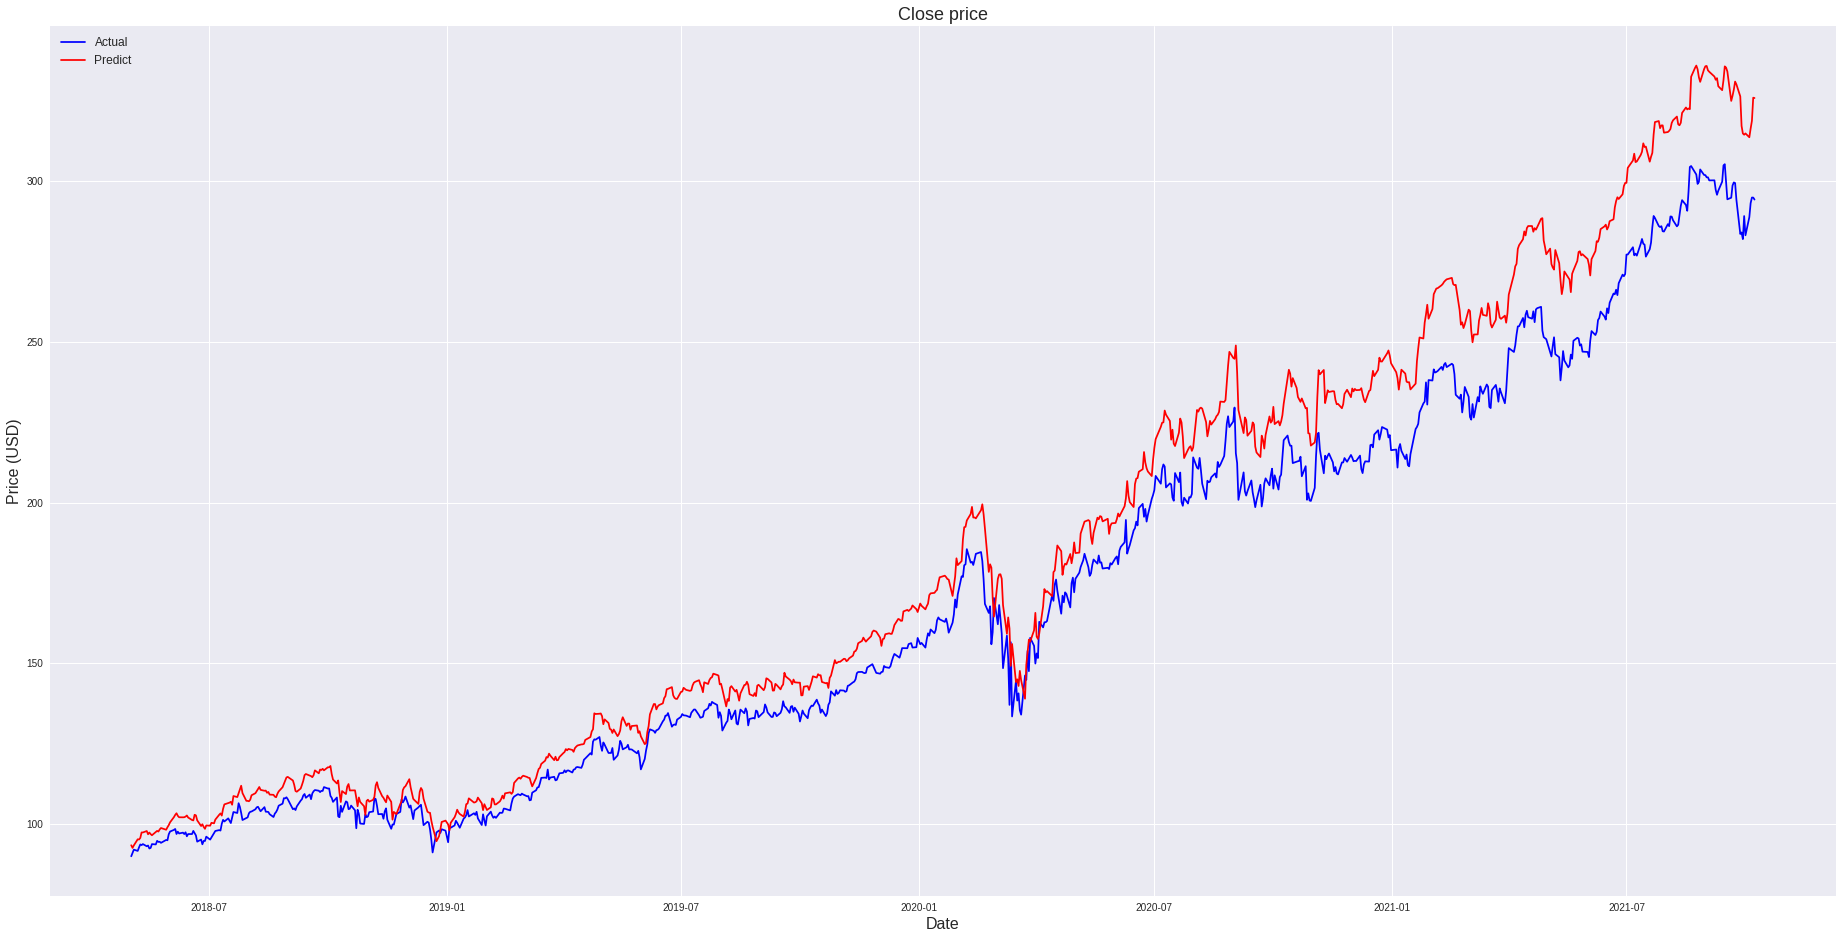

In [114]:
plot( y_close_test.sort_index().index,
     y_close_test.sort_index(),
     y_close_pred_ts,
     Xtrain = y_close_train.sort_index().index,
     #Ytrain = y_close_train.sort_index(),
     Title = "Close price",
     Xlabel = 'Date',
     Ylabel = 'Price (USD)' 
)

##**Report :**

In [115]:
print("Report for Linear Regression")
result(y_close_test,y_close_pred_ls,'LS')
print("")

print("Report for Random Forest")
result(y_close_test,y_close_pred_rf,'RF')
print("")

print("Report for SVM Regression")
result(y_close_test,y_close_pred_svr,'SVM')
print("")

print("Report for Multilayer")
result(y_close_test,y_close_pred_ts,'TS')
print("")


Report for Linear Regression
LS RMSE: 3.079803382739052
LS MAE:  2.1021140479437026
LS MAPE: 1.2528875111577578

Report for Random Forest
RF RMSE: 101.12135767751987
RF MAE:  80.40846981545552
RF MAPE: 39.97148070715656

Report for SVM Regression
SVM RMSE: 125.58659721247625
SVM MAE:  99.40576798612005
SVM MAPE: 49.4185782668112

Report for Multilayer
TS RMSE: 16.430846379334394
TS MAE:  13.56004172896899
TS MAPE: 49.601064643418155

